# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv('demo01_tratada.csv')
df

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,0,0,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,1,0,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,1,0,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,0,0,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,0,0,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,1,0,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,0,0,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
# Separando a variavel target:
y = df.mau

In [6]:
# Restante das variaveis:
x = df.drop('mau', axis=1)

In [7]:
# Separando treino x teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [8]:
# 1. Defina um objeto com a função da árvore de decisão vista em aula.
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [9]:
# 2. Treine o modelo com os dados que você separou para treinamento.
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

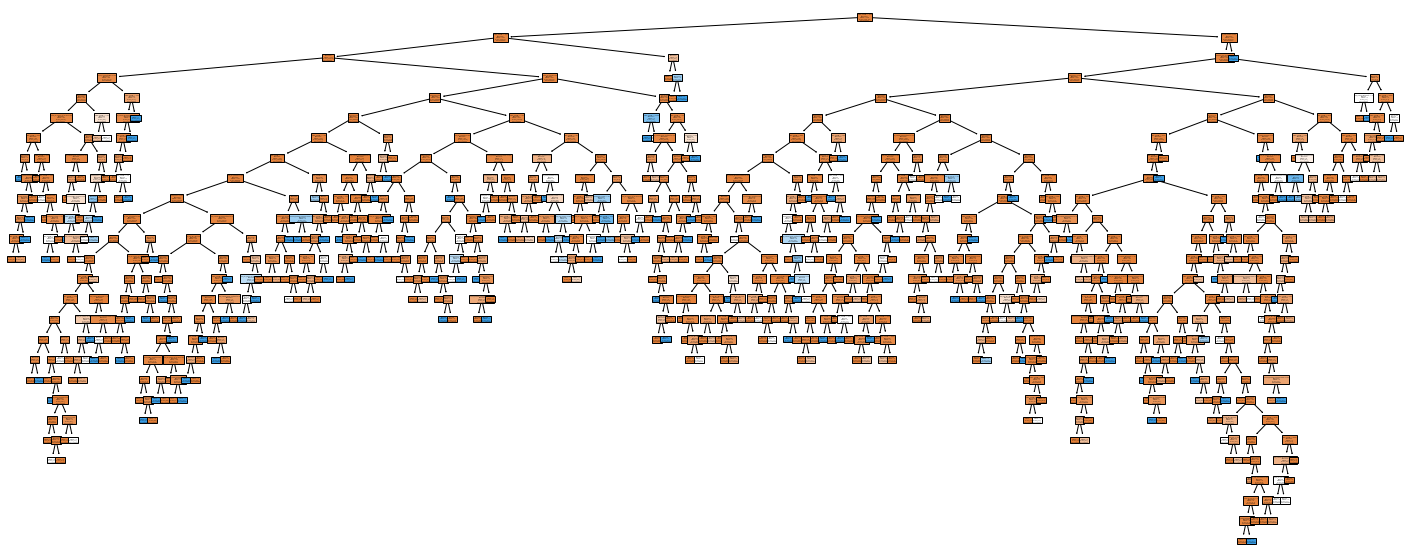

In [10]:
# 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(25, 10))
plot_tree(clf,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=x_train.columns);

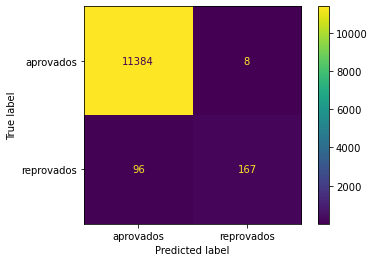

In [11]:
# 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
plot_confusion_matrix(clf, x_train, y_train, display_labels=['aprovados', 'reprovados']);

In [12]:
# 5. Calcule a acurácia na base de treinamento
predict = clf.predict(x_train)

accuracy_score(y_train, predict)
                

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

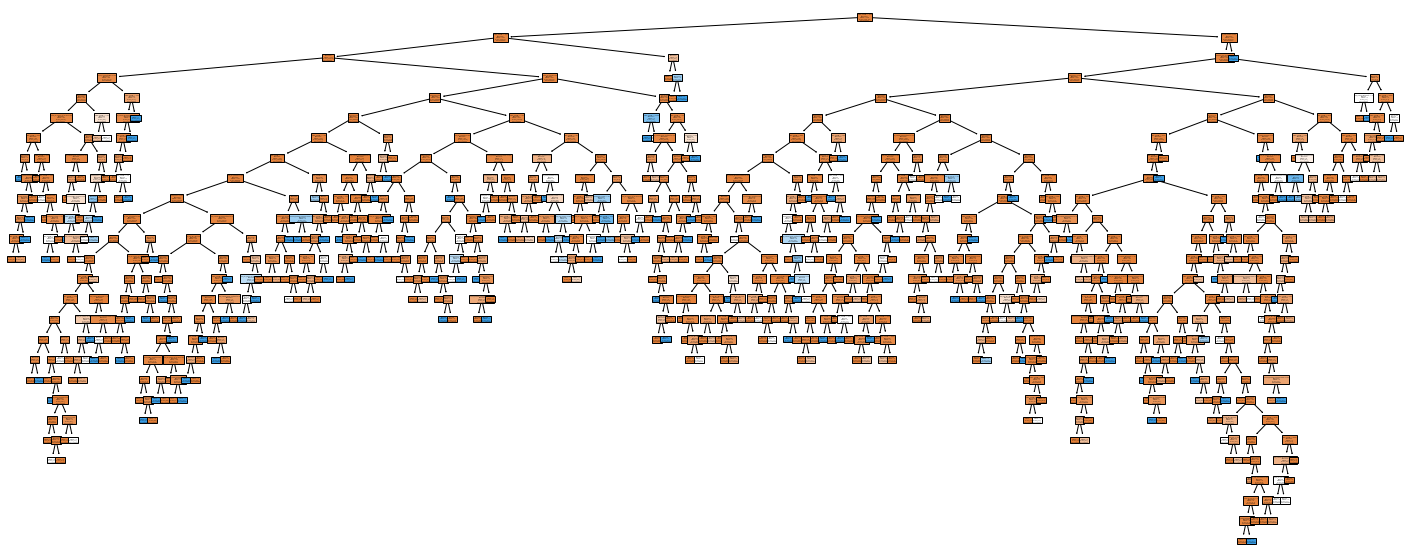

In [13]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.

plt.figure(figsize=(25, 10))
plot_tree(clf,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=x_test.columns);

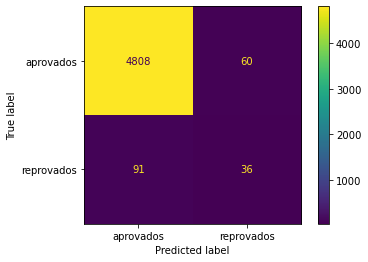

In [14]:
# 2. Produza a visualização da matriz de confusão para a base de teste.
plot_confusion_matrix(clf, x_test, y_test, display_labels=['aprovados', 'reprovados']);

In [15]:
#3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.9697697697697698

In [20]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. 
# Avalie a matriz de classificação. Observe a distribuição da predição - 
# qual a proporção de proponentes foram classificados como 'maus'?

# Treinando arvore
clf_pod = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pod = clf_pod.fit(x_train,y_train)

# Teste da proporção
y_proporcao = clf_pod.predict(x_train)

print(f'Aprovados: {list(y_proporcao).count(0)}')
print(f'Reprovados: {list(y_proporcao).count(1)}')

Aprovados: 11598
Reprovados: 57


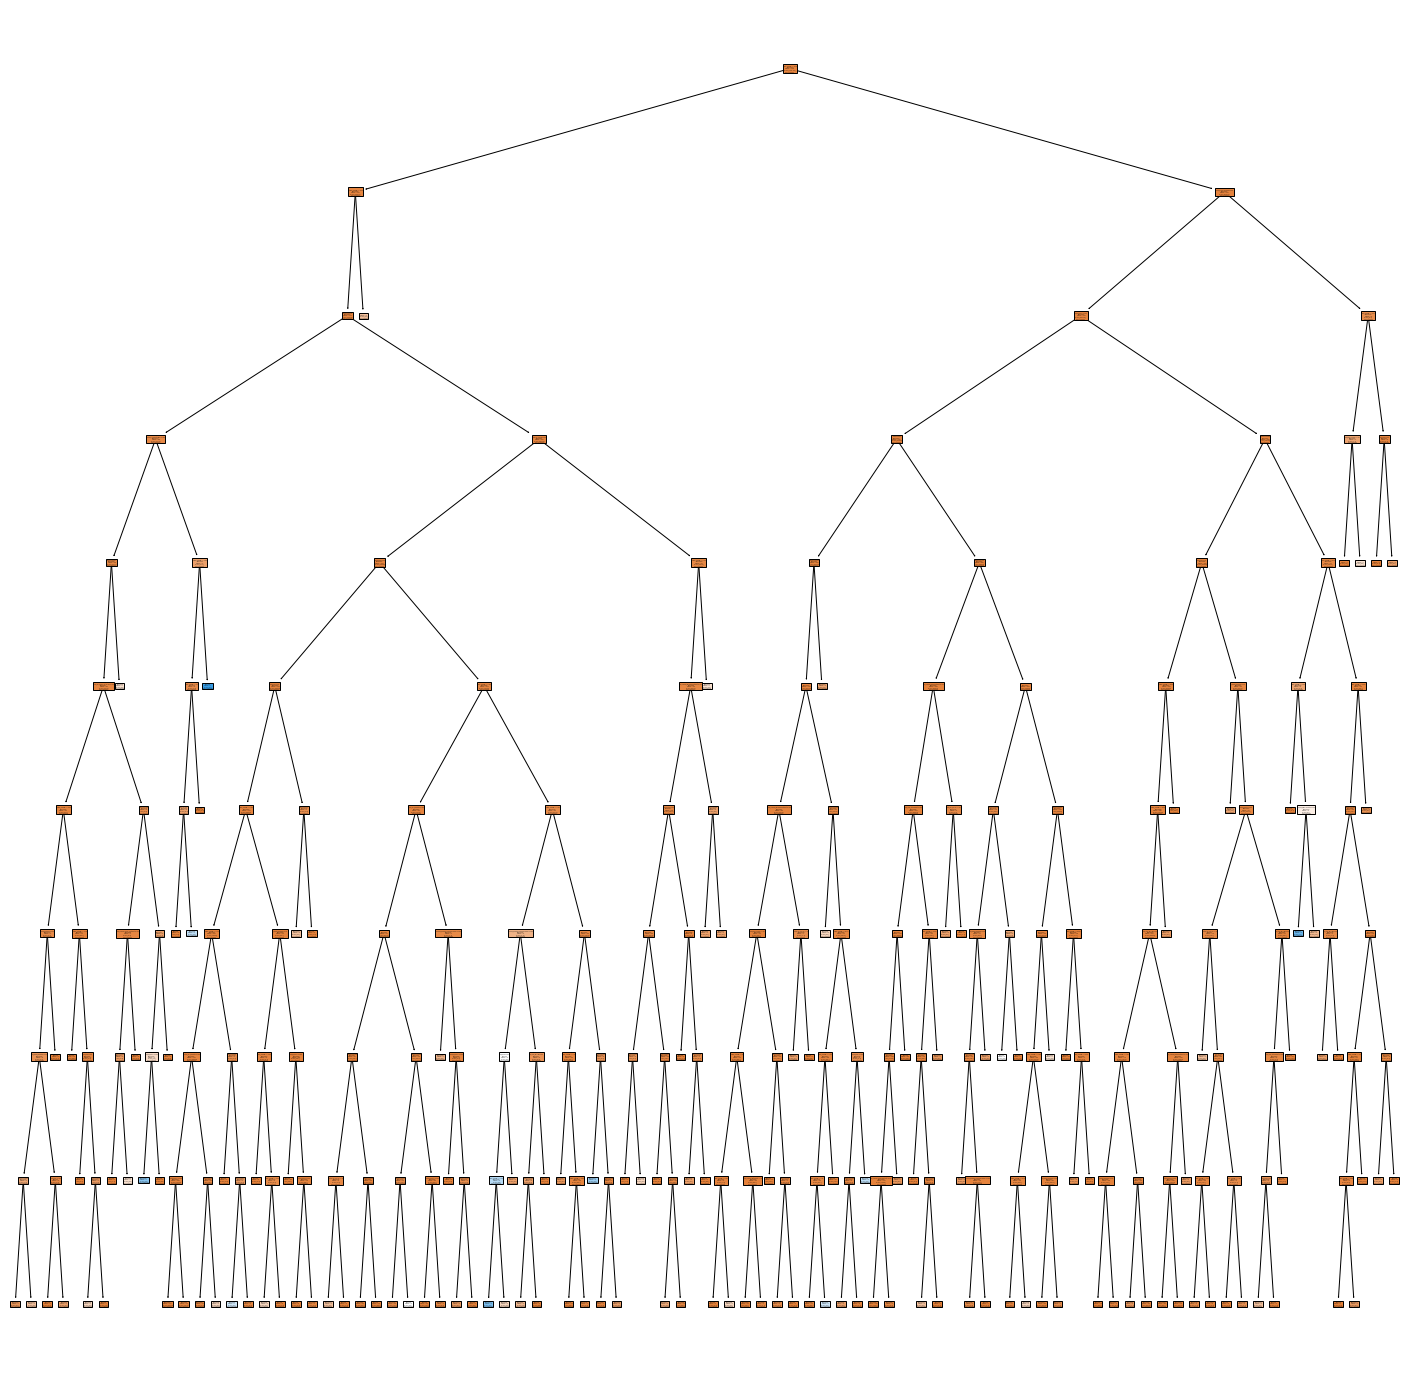

In [23]:
plt.figure(figsize=(25, 25))
plot_tree(clf_pod,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=x_train.columns);

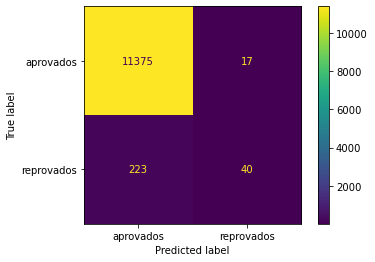

In [24]:
plot_confusion_matrix(clf_pod, x_train, y_train, display_labels=['aprovados', 'reprovados']);

In [25]:
# 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

y_train.loc[y_train == 1] = 0

predict = clf_pod.predict(x_train)

accuracy_score(y_train, predict)

0.9951093951093951

A acuracia seria praticamente de 1.0